In [30]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow import keras

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
train_dir = r'/home/vaibhav/Downloads/Fruit_recognition/archive/fruits-360-original-size/fruits-360-original-size/Training'
valid_dir = r'/home/vaibhav/Downloads/Fruit_recognition/archive/fruits-360-original-size/fruits-360-original-size/Validation'
test_dir = r'/home/vaibhav/Downloads/Fruit_recognition/archive/fruits-360-original-size/fruits-360-original-size/Test'

In [33]:
train_gen = ImageDataGenerator(rescale=1./255.)
test_gen = ImageDataGenerator( rescale=1./255. )

In [34]:
train_data = train_gen.flow_from_directory(train_dir,
                                           (100,100),
                                           class_mode='sparse',
                                           batch_size=25)

valid_data = test_gen.flow_from_directory(valid_dir,
                                          (100,100),
                                          class_mode='sparse'
                                          ,batch_size=25)

Found 5605 images belonging to 21 classes.
Found 2804 images belonging to 21 classes.


In [35]:
model = keras.models.Sequential()

In [36]:
from tensorflow.keras import layers

In [37]:
model.add(layers.Conv2D(32,(3,3),activation = "relu",input_shape=[100,100,3]))

In [38]:
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(200,activation = "relu"))
model.add(layers.Dense(150,activation = "relu"))

model.add(layers.Dense(21,activation = "softmax"))

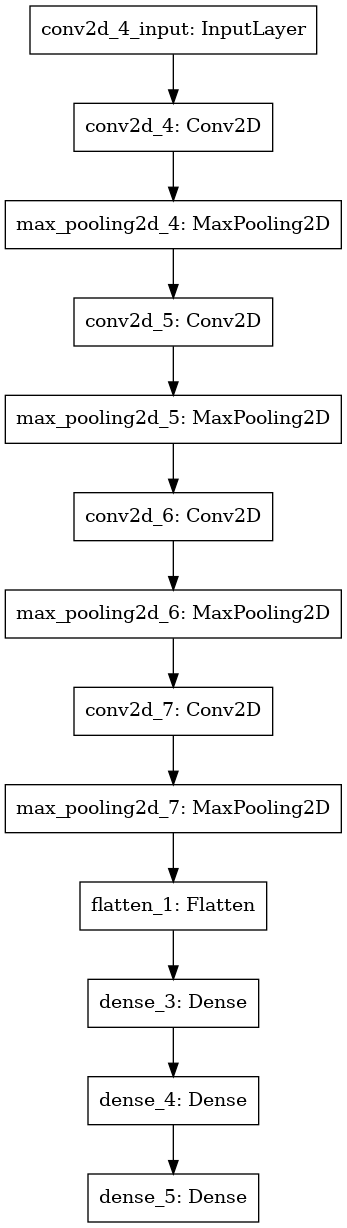

In [39]:
keras.utils.plot_model(model)

In [40]:
model.compile(keras.optimizers.RMSprop(lr=0.001),"sparse_categorical_crossentropy",["acc"])

In [41]:
model_his = model.fit_generator(train_data,
                                224,
                                30,
                               validation_data=valid_data,
                               validation_steps=112)

Epoch 1/30
224/224 [==============================] - 45s 199ms/step - loss: 1.8609 - acc: 0.4043 - val_loss: 1.1859 - val_acc: 0.6629
Epoch 2/30
224/224 [==============================] - 44s 195ms/step - loss: 0.3546 - acc: 0.8732 - val_loss: 0.0418 - val_acc: 0.9975
Epoch 3/30
224/224 [==============================] - 47s 210ms/step - loss: 0.1649 - acc: 0.9516 - val_loss: 0.0272 - val_acc: 0.9868
Epoch 4/30
224/224 [==============================] - 45s 199ms/step - loss: 0.1081 - acc: 0.9729 - val_loss: 7.6474e-04 - val_acc: 1.0000
Epoch 5/30
224/224 [==============================] - 46s 204ms/step - loss: 0.1003 - acc: 0.9782 - val_loss: 1.2725 - val_acc: 0.8136
Epoch 6/30
224/224 [==============================] - 46s 203ms/step - loss: 0.0972 - acc: 0.9833 - val_loss: 0.0800 - val_acc: 0.9732
Epoch 7/30
224/224 [==============================] - 47s 211ms/step - loss: 0.1315 - acc: 0.9781 - val_loss: 4.0637e-05 - val_acc: 1.0000
Epoch 8/30
224/224 [===========================

<AxesSubplot:>

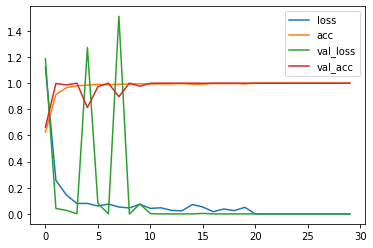

In [42]:
pd.DataFrame(model_his.history).plot()

In [46]:
test_data = test_gen.flow_from_directory(test_dir,(100,100),class_mode="sparse",batch_size=25)

Found 2799 images belonging to 21 classes.


In [77]:
model.evaluate_generator(test_data)

[0.0, 1.0]